# Fit Suit

## Installing PoseNet

In [ ]:
 # Clone the repo and install 3rd-party libraries. 
!git clone https://www.github.com/ildoonet/tf-openpose 
%cd tf-openpose
!pip3 install -r requirements.txt

# Build c++ library for post processing. See : https://github.com/ildoonet/tf-pose-estimation/tree/master/tf_pose/pafprocess
%cd tf_pose/pafprocess
!sudo apt install swig
# !swig -python -c++ ,pafprocess.i && python3 setup.py build_ext --inplace
!swig -python -c++ pafprocess.i && python3 setup.py build_ext --inplace
%cd ../..

## Use Posenet api

*Upload image from google drive*

In [ ]:
!pip install PyDrive
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import io
import zipfile
from google.colab import files
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
from IPython.display import Image, display


In [ ]:
# https://drive.google.com/file/d/1UipgdGRzsiHFbjUiPs_YKCSbzDqpS_zR/view?usp=sharing
# https://drive.google.com/file/d/1DhYW8OwLG-bpxN8x6rCocZE9Fs4L1m57/view?usp=sharing
# https://drive.google.com/file/d/1eAxxioELF7lxvmfSxs14X3JSqm7aPMGa/view?usp=sharing
# https://drive.google.com/file/d/1KDB-OG_5BNZlyB9hDLeiywrQ7OlK_LE_/view?usp=sharing
# https://drive.google.com/file/d/15Y2AB4sCRwBLxzbSyrHC1u6_QdxHYKZU/view?usp=sharing
# https://drive.google.com/file/d/1OYy_0rnFGtp33R32SZrLAlhrIbIaIz7u/view?usp=sharing
# https://drive.google.com/file/d/1H7LTG_FuS3T4mCb1Z_kFG6g1_VWs8R4B/view?usp=sharing
# https://drive.google.com/file/d/1GtkI4XvcFEdKOOXUjzzkzwrhZqHYNQWx/view?usp=sharing
# https://drive.google.com/file/d/1WWCshW7oo6zeMczbLcRl8x7VpqaE4jWo/view?usp=sharing
download = drive.CreateFile({'id': "10MIkTIJnokp5JxTLlG6ARrIqiXGQawSN"})
download.GetContentFile('suit.png')
download = drive.CreateFile({'id': "1rVQ0o8SObLq1YdLkZYE13tpkfK1qWg2-"})
download.GetContentFile('left_arm.png')
download = drive.CreateFile({'id': "1LnOzl3b3DgAV_2WcB5qmHNfmZ5Qrv6Mg"})
download.GetContentFile('right_arm.png')

download = drive.CreateFile({'id': '1CYqSn4PFWpVpTZ6VUp4kvs8qXK-3rg1w'})
download.GetContentFile('file.jpg')
download = drive.CreateFile({'id': '1DhYW8OwLG-bpxN8x6rCocZE9Fs4L1m57'})
download.GetContentFile('file1.jpg')
download = drive.CreateFile({'id': '1DhYW8OwLG-bpxN8x6rCocZE9Fs4L1m57'})
download.GetContentFile('file2.jpg')
download = drive.CreateFile({'id':'1tAuIbdYdAY_zJCamdFQg0N7uPespu6Cf'})
download.GetContentFile('file3.jpg')
download = drive.CreateFile({'id': '1KDB-OG_5BNZlyB9hDLeiywrQ7OlK_LE_'})
download.GetContentFile('file4.jpg')
download = drive.CreateFile({'id': '15Y2AB4sCRwBLxzbSyrHC1u6_QdxHYKZU'})
download.GetContentFile('file5.jpg')
download = drive.CreateFile({'id': '1OYy_0rnFGtp33R32SZrLAlhrIbIaIz7u'})
download.GetContentFile('file6.jpg')
download = drive.CreateFile({'id': '1H7LTG_FuS3T4mCb1Z_kFG6g1_VWs8R4B'})
download.GetContentFile('file7.jpg')
download = drive.CreateFile({'id': '1GtkI4XvcFEdKOOXUjzzkzwrhZqHYNQWx'})
download.GetContentFile('file8.jpg')
download = drive.CreateFile({'id': '1WWCshW7oo6zeMczbLcRl8x7VpqaE4jWo'})
download.GetContentFile('file9.jpg')

# download = drive.CreateFile({'id': '1juQfMY3bejIuWCY0nWnX0POMulQGao42'})
# download.GetContentFile('file10.jpg')

# download = drive.CreateFile({'id': '1M3qzNyMhTj3lV8cg_y9YRk4jfaGU9U6K'})
# download.GetContentFile('file11.jpg')
# download = drive.CreateFile({'id': '1hCX1MKMB-GiwzhrMoog0iTT6UiY49ZPO'})
# download.GetContentFile('file12.jpg')
# download = drive.CreateFile({'id': '1843Uepf-sE5_jeVMxCgF7mw4_C1JRqf8'})
# download.GetContentFile('file13.jpg')
# https://drive.google.com/file/d/1H_tCdzNcQUEbpwE__iUIQXPGXVmD4SnY/view?usp=sharing
# https://drive.google.com/file/d/1flKl5q6uW19Y3lg_LJDUsYqXTKavVFvS/view?usp=sharing
# https://drive.google.com/file/d/1BTWZpVPsXwwkYoXM-shiWdETSyowfxIS/view?usp=sharing
download = drive.CreateFile({'id': '1H_tCdzNcQUEbpwE__iUIQXPGXVmD4SnY'})
download.GetContentFile('file20.jpg')
download = drive.CreateFile({'id': '1BTWZpVPsXwwkYoXM-shiWdETSyowfxIS'})
download.GetContentFile('file21.png')
# https://drive.google.com/file/d/1juQfMY3bejIuWCY0nWnX0POMulQGao42/view?usp=sharing

## Remove background

In [ ]:
import requests
api_key = 'uoeUULLTrpiCScjmWiETkf6b' 

def get_no_bg_img(path, api_key):
    API_KEY = api_key
    headers = {
        'X-API-Key': API_KEY,
    }

    files = {
        'image_file': (path, open(path, 'rb')),
    }

    response = requests.post('https://api.remove.bg/v1.0/removebg', headers=headers, files=files)
    return response

In [ ]:
# path = 'file4.jpg'
image_path = 'file20.jpg'

no_bg_path = 'new_no_bg.png'
no_bg_path = image_path
# response = get_no_bg_img(image_path, api_key)
# with open(no_bg_path,'wb') as f:
#     f.write(response.content)


In [ ]:
# to download file without background
files.download(no_bg_path)

In [ ]:
no_bg_path

'file20.jpg'

In [ ]:
import numpy as np
import cv2
import math
import itertools as it

class Line():
    def __init__(self, shape, x1, y1, x2, y2):

        ''' Define line by 2 dots'''
        im_shape = shape
        x = np.arange(im_shape[0])
        y = np.arange(im_shape[1])
        self.x0 = 0
        if x1 != x2:
            m = (y1 - y2) / (x1 - x2)
            #           if m == -1:
            #               print('x1!=x2', x1,y1,x2,y2)

            b = y1 - m * x1
            if abs(y1 - y2) <= abs(x1 - x2):
                y = m * x + b
            else:
                x = (y - b) / m

        if x1 == x2:
            print('x1==x2', x1, y1, x2, y2)
            x = np.array([x1 for i in range(shape[0])])
            m = 'vertical'
            b = -1

            self.x0 = x1
        x = x.astype(int)
        y = y.astype(int)
        self.m = m
        self.b = b
        self.y = y
        self.x = x

    def get_area(self, cont, x_lim=None, y_lim=None, location='above'):
        ''' Get coords under or above line'''

        rez = []
        ind1 = cont[:, 0] > x_lim[0]
        ind2 = cont[:, 0] < x_lim[1]
        ind3 = cont[:, 1] > y_lim[0]
        ind4 = cont[:, 1] < y_lim[1]
        ind = ind1 * ind2 * ind3 * ind4
        cont = cont[ind]
        if location == 'above':

            for c in cont:
                if c[1] <= (self.m * c[0] + self.b):
                    rez.append(c)
        return np.array(rez)

    def is_on_line(self, xi, yi):
        ''' Check that the point belongs to the line'''

        if (self.m == 'vertical') and (xi == self.x0):
            return True

        if (self.m == 'vertical') and (xi != self.x0):
            return False

        if abs(yi - (self.m * xi + self.b)) < 0.5 or abs(xi - (yi - self.b) / self.m) < 0.5:
            return True

        else:
            return False

    def get_line(self):
        ''' Get the line points'''

        return self.x, self.y


def get_contour_list(img):
    npimg = img.copy()
    biggest_contour, mask = find_biggest_contour(npimg)
    npimg = cv2.drawContours(npimg, [biggest_contour], -1, [0, 255, 0], 2)
    rows, columns = np.where((npimg == [0, 255, 0]).all(axis=-1))
    cont = np.array(list(zip(columns, rows)))
    return cont


def get_nearest_points(points, dot1, dot2):
    p1_vec = np.array([dot1[0] - dot2[0], dot1[1] - dot2[1]])
    p2_vec = np.array([dot2[0] - dot1[0], dot2[1] - dot1[1]])
    if points != []:

        p1_side = points[np.dot(points - dot2, p1_vec) > 0]
        p2_side = points[np.dot(points - dot1, p2_vec) > 0]

        dists2first = np.sqrt((dot1[0] - p1_side[:, 0]) ** 2 + (dot1[1] - p1_side[:, 1]))
        dists2second = np.sqrt((dot2[0] - p2_side[:, 0]) ** 2 + (dot2[1] - p2_side[:, 1]))

        #     dists2first = np.sqrt((dot1[0] - dists2first[:,0])**2 + (dot1[1] - dists2first[:,1]))
        #     dists2second = np.sqrt((dot2[0] - dists2second[:,0])**2 + (dot2[1] - dists2second[:,1]))
        #     print(dists2first, dists2second)
        nearest2first = sorted(list(zip(p1_side, dists2first)), key=lambda x: x[1])[0][0]
        nearest2second = sorted(list(zip(p2_side, dists2second)), key=lambda x: x[1])[0][0]
        return nearest2first, nearest2second
    else:
        return [0, 0], [5, 5]


def get2points(cont, p1, p2, im_shape):
    line = Line(im_shape, p1[0], p1[1], p2[0], p2[1])
    points = np.array([k for k in cont if line.is_on_line(*k)])
    d1, d2 = get_nearest_points(points, p1, p2)
    return d1, d2


def get_shoulder(cont, key_points, side='left'):
    """
    Get shoulder point coord
    :input
    - cont       -- array of big contour pixels
    - key_points -- dict of human key points
    - side       -- side of shoulder
    :return
    - [x, y]     -- list of shoulder coord
    """

    n1, n2 = sorted([key_points['neck'][0], key_points['neck'][1]], key=lambda x: x[1], reverse=True)
    if side == 'left':
        d1, d2 = sorted([key_points['left_elbow'][0], key_points['left_elbow'][1]], key=lambda x: x[1], reverse=True)
        l_arm, l_armpit = sorted([key_points['left_arm'][0], key_points['left_arm'][1]], key=lambda x: x[1])

        line = Line((0, 0), *d2, *n2)
        x_lim = (min(l_arm[0], n2[0]), max(d2[0], n2[0]))
        y_lim = (min(d2[1], n2[1]), max(d2[1], n2[1]))
        curve = line.get_area(cont, x_lim, y_lim)
        curve = np.array(sorted(curve, key=lambda x: x[0]))
        x = curve[:, 0]
        y = -curve[:, 1]
        koeficienti_polinom_1 = np.polyfit(x, y, 2)

        line = Line((0, 0), *d2, *n2)
        x_lim = (min(d2[0], n2[0]), max(d2[0], n2[0]))
        y_lim = (min(d2[1], n2[1]), max(d2[1], n2[1]))
        curve = line.get_area(cont, x_lim, y_lim)
        curve = np.array(sorted(curve, key=lambda x: x[0]))
        x_full = curve[:, 0]
        y_full = -curve[:, 1]
        x_ = x_full[x_full <= l_arm[0]]
        y_ = y_full[x_full <= l_arm[0]]
        koeficienti_polinom_2 = np.polyfit(x_, y_, 2)
        p = np.poly1d(koeficienti_polinom_2)

    elif side == 'right':
        d1, d2 = key_points['right_elbow']
        n1, n2 = key_points['neck']
        r_arm, r_armpit = sorted([key_points['right_arm'][0], key_points['right_arm'][1]], key=lambda x: x[1])

        line = Line((0, 0), *d1, *n2)
        x_lim = (min(d1[0], n1[0]), max(262, n1[0]))
        y_lim = (min(d1[1], n1[1]), max(d1[1], n1[1]))
        curve = line.get_area(cont, x_lim, y_lim)
        curve = np.array(sorted(curve, key=lambda x: x[0]))
        x = curve[:, 0]
        y = -curve[:, 1]
        koeficienti_polinom_1 = np.polyfit(x, y, 2)

        line = Line((0, 0), *d1, *n2)
        x_lim = (min(d1[0], n1[0]), max(d1[0], n1[0]))
        y_lim = (min(d1[1], n1[1]), max(d1[1], n1[1]))
        curve = line.get_area(cont, x_lim, y_lim)
        #         print(curve)
        curve = np.array(sorted(curve, key=lambda x: x[0]))
        x_full = curve[:, 0]
        y_full = -curve[:, 1]

        x_ = x_full[x_full >= r_arm[0]]
        y_ = y_full[x_full >= r_arm[0]]

        koeficienti_polinom_2 = np.polyfit(x_, y_, 2)
        p = np.poly1d(koeficienti_polinom_2)

    # find leftmost intersection point
    poly = np.poly1d(koeficienti_polinom_1 - koeficienti_polinom_2)
    if side == 'left':
        x_r = np.min(poly.r)
        y_r = p(x_r)
        if abs(y_r - l_arm[1]) > 3:
            y_r = l_arm[1]
        if abs(x_r - l_armpit[0]) > 20:
            x_r = l_armpit[0]
    else:
        x_r = np.max(poly.r)
        y_r = p(x_r)
        if abs(y_r - r_arm[1]) > 3:
            y_r = r_arm[1]
        if abs(x_r - r_armpit[0]) > 20:
            x_r = r_armpit[0]
    return [int(abs(x_r)), int(abs(y_r))]

def find_biggest_contour(image):
    # Copy
    mask = image.copy()
    # input, gives all the contours, contour approximation compresses horizontal,
    # vertical, and diagonal segments and leaves only their end points. For example,
    # an up-right rectangular contour is encoded with 4 points.
    # Optional output vector, containing information about the image topology.
    # It has as many elements as the number of contours.
    # we dont need it
    for i in range(len(mask)):
        for j in range(len(mask[0])):
            if (image[i][j] != np.array([0, 0, 0])).all():
                mask[i][j] = np.array([255, 255, 255])
    imgray = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(imgray, 127, 255, 0)
    im2, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    # Isolate largest contour
    contour_sizes = [(cv2.contourArea(contour), contour) for contour in contours]
    biggest_contour = max(contour_sizes, key=lambda x: x[0])[1]

    mask = np.zeros(image.shape, np.uint8)
    return biggest_contour, mask

def get_armpit_coords(contour, centers, arm):
    def y(p, d1, d2):
        if d1[0] != d2[0]:
            m = (d1[1] - d2[1]) / (d1[0] - d2[0])
        else:
            m = 0
        b = d1[1] - m * d1[0]

        y = m * p[:, 0] + b

        return y < p[:, 1]

    c = contour

    if arm == 'left':
        left_dot, right_dot, top_dot, bot_dot = centers[3], centers[8], centers[2], centers[8]
        left_dot = min(left_dot[0], top_dot[0]) + abs(top_dot[0] - left_dot[0]) / 3, left_dot[1]
        ind5 = y(c[:, 0, :], centers[3], centers[2]).reshape(c[:, :, 0].shape)

    if arm == 'right':
        left_dot, right_dot, top_dot, bot_dot = centers[8], centers[6], centers[5], centers[11]

        right_dot = min(right_dot[0], top_dot[0]) + abs(top_dot[0] - right_dot[0]) / 3, right_dot[1]
        ind5 = y(c[:, 0, :], centers[5], centers[6]).reshape(c[:, :, 0].shape)

    ind3 = c[:, :, 0] > left_dot[0]
    ind4 = c[:, :, 0] < right_dot[0]

    ind = c[:, :, 1] > top_dot[1]
    ind2 = c[:, :, 1] < bot_dot[1]
    ind = ind * ind2 * ind3 * ind4 * ind5
    c = contour[ind]
    extLeft = tuple(c[c[:, 0].argmin()])
    extRight = tuple(c[c[:, 0].argmax()])
    extTop = tuple(c[c[:, 1].argmin()])
    extBot = tuple(c[c[:, 1].argmax()])
    extTop = extTop[0], extTop[1]

    return extLeft, extRight, extTop, extBot


def getPerpCoord(aX, aY, bX, bY, length):
    vX = bX - aX
    vY = bY - aY
    if vX == 0:
        return bX, bY + length, bX, bY - length

    if vY == 0:
        return bX + length, bY, bX - length, bY

    mag = math.sqrt(vX * vX + vY * vY)
    vX = vX / mag
    vY = vY / mag
    temp = vX
    vX = 0 - vY
    vY = temp
    cX = bX + vX * length
    cY = bY + vY * length
    dX = bX - vX * length
    dY = bY - vY * length
    return int(cX), int(cY), int(dX), int(dY)


def getVector(aX, aY, bX, bY):
    vX = bX - aX
    vY = bY - aY
    return vX, vY


def is_black(img, x, y):
    if (img[x][y] != (0, 0, 0)).all():
        return True
    else:
        return False


def get_line(img, x1, y1, x2, y2):
    nimg = img.copy()
    with_line = cv2.line(img, (x1, y1), (x2, y2), [0, 255, 0], 3)
    line_ind = (nimg != with_line).all(axis=-1)
    nimg[line_ind] = [0, 255, 255]
    return nimg


def extend_line(img, biggest_contour, x1, y1, x2, y2, armpit=False):
    copy_img = img.copy()
    contured_img = cv2.drawContours(copy_img, [biggest_contour], -1, [0, 255, 0], 3)
    ind_contour = (contured_img == [0, 255, 0]).all(axis=-1)

    # slope
    if x1 != x2:
        m = (y1 - y2) / (x1 - x2)
    else:
        m = 0
    b = y1 - m * x1

    ax = max(x1, x2)
    ay = int(round(m * ax + b))

    bx = min(x1, x2)
    by = int(round(m * bx + b))
    # Удлиняем отрезки, пока не пересечемся с контуром тела
    contour = biggest_contour[:, -1]
    while not ind_contour[ay][ax]:
        ax += 1
        ay = int(round(m * ax + b))

        if abs(ay) >= ind_contour.shape[0] or abs(ax) >= ind_contour.shape[1]:
            break

    while not ind_contour[by][bx]:
        bx -= 1
        by = int(round(m * bx + b))

        if abs(by) >= ind_contour.shape[0] or abs(bx) >= ind_contour.shape[1]:
            break

    return ax, ay, bx, by


def neck_parts(p, d1, d2):
    """p - contour dots list"""

    if d1[0] != d2[0]:
        m = (d1[1] - d2[1]) / (d1[0] - d2[0])
    else:
        m = 0
    b = d1[1] - m * d1[0]

    med_y = min(d1[1], d2[1]) + abs(d1[1] - d2[1]) / 2
    max_y = max(d1[1], d2[1])
    ind = (p[:, 1] > med_y) * (p[:, 1] < max_y)
    y1 = m * p[:, 0] + b
    x1 = np.round((p[:, 1] - b) / m)
    ind_l = x1 > p[:, 0]
    ind_l = ind_l * ind

    ind_r = x1 < p[:, 0]
    ind_r = ind_r * ind

    return {'left_part': ind_l, 'right_part': ind_r}


def find_min_dist(contour, ind_l, ind_r):
    left_part = contour[ind_l][:, -1]
    right_part = contour[ind_r][:, -1]

    min_dist = 1000000
    dots = []
    for i in left_part:
        for j in right_part:
            dist = np.sqrt((i[0] - j[0]) ** 2 + (i[1] - j[1]) ** 2)
            if dist < min_dist:
                min_dist = dist
                dots = ((i[0], i[1]), (j[0], j[1]))

    return dots


def get_neck_coords(contour, centers):
    parts = neck_parts(contour[:, 0, :], centers[0], centers[1])
    left_ind = parts['left_part']

    right_ind = parts['right_part']

    p1, p2 = find_min_dist(contour, left_ind, right_ind)

    return p1, p2

class Segmentator():
    def __init__(self):
        self.pairs = [(6, 7), (5, 6), (2, 3), (3, 4), (8, 9), (9, 10), (11, 12), (12, 13)]
        self.pairs_dict = {(6, 7): 'right_wrist', (5, 6): 'right_elbow', (2, 3): 'left_elbow', (3, 4): 'left_wrist',
                      (8, 9): 'left_knee', (9, 10): 'left_ankle', (11, 12): 'right knee', (12, 13): 'right_ankle'}
        
        
    def get_key_points(self, npimg, centers):
        """
        :input
            npimg - numpy array
            centers - dict of pose points
        :return
            npimg, key_points
        """
        self.key_points = {}
        self.npimg = npimg
        self.centers = centers
        self.cont = get_contour_list(npimg)
        self.im_shape = npimg.shape

        self.biggest_contour, mask = find_biggest_contour(npimg)

        for pair in self.pairs:
            line_coords = getPerpCoord(*self.centers[pair[0]], *self.centers[pair[1]], 3)

            p1 = (line_coords[0], line_coords[1])
            p2 = (line_coords[2], line_coords[3])
            #                 print(p1,p2)
            x1, y1, x2, y2 = extend_line(npimg, self.biggest_contour, *p1, *p2)
            #                 npimg = get_line(npimg, x1, y1, x2, y2)
            d1, d2 = get2points(self.cont, (x1, y1), (x2, y2), self.im_shape)
            npimg = get_line(npimg, d1[0], d1[1], d2[0], d2[1])
            #                 npimg = cv2.line(npimg, (d1[0], d1[1]), (d2[0], d2[1]), [0,255,0], 3)
            d1 = (d1[0], d1[1])
            d2 = (d2[0], d2[1])

            self.key_points[self.pairs_dict[pair]] = (d1, d2)

        # neck
        p1, p2 = get_neck_coords(self.biggest_contour, self.centers)
        cv2.circle(npimg, p1, 3, (255, 0, 0), -1)
        cv2.circle(npimg, p2, 3, (255, 0, 0), -1)
        x1, y1, x2, y2 = extend_line(npimg, self.biggest_contour, *p1, *p2)
        npimg = get_line(npimg, x1, y1, x2, y2)
        self.key_points['neck'] = ((x1, y1), (x2, y2))

        # left arm
        extLeft, extRight, extTop, extBot = get_armpit_coords(self.biggest_contour, self.centers, 'left')
        x1, y1, x2, y2 = extend_line(npimg, self.biggest_contour, *self.centers[2], *extTop, armpit=True)
        #             npimg = get_line(npimg, x1, y1, x2, y2)
        d1, d2 = get2points(self.cont, (x1, y1), (x2, y2), self.im_shape)
        npimg = get_line(npimg, d1[0], d1[1], d2[0], d2[1])
        #             npimg = cv2.line(npimg, (x1,y1), (x2,y2), [0,255,0], 3)
        d1 = (d1[0], d1[1])
        d2 = (d2[0], d2[1])
        self.key_points['left_arm'] = (d1, d2)

        # right arm
        extLeft, extRight, extTop, extBot = get_armpit_coords(self.biggest_contour, self.centers, 'right')
        x1, y1, x2, y2 = extend_line(npimg, self.biggest_contour, *self.centers[5], *extTop, armpit=True)
        #             npimg = get_line(npimg, x1, y1, x2, y2)
        d1, d2 = get2points(self.cont, (x1, y1), (x2, y2), self.im_shape)
        npimg = get_line(npimg, d1[0], d1[1], d2[0], d2[1])
        d1 = (d1[0], d1[1])
        d2 = (d2[0], d2[1])
        self.key_points['right_arm'] = (d1, d2)

        # legs
        x1, y1, x2, y2 = extend_line(npimg, self.biggest_contour, *self.centers[8], *self.centers[11])
        npimg = get_line(npimg, x1, y1, x2, y2)
        self.key_points['legs'] = ((x1, y1), (x2, y2))

        # neck
        p1, p2 = get_neck_coords(self.biggest_contour, self.centers)
        cv2.circle(npimg, p1, 3, (255, 0, 0), -1)
        cv2.circle(npimg, p2, 3, (255, 0, 0), -1)
        x1, y1, x2, y2 = extend_line(npimg, self.biggest_contour, *p1, *p2)
        npimg = get_line(npimg, x1, y1, x2, y2)
        return npimg, self.key_points, self.cont

In [ ]:
import argparse
import logging
import sys
import time

from tf_pose import common
import cv2
import numpy as np
from tf_pose.estimator import TfPoseEstimator
from tf_pose.networks import get_graph_path, model_wh

class Pose_estimator():
    def __init__(self):
        self.logger = logging.getLogger('TfPoseEstimator')
        self.logger.setLevel(logging.DEBUG)
        ch = logging.StreamHandler()
        ch.setLevel(logging.DEBUG)
        formatter = logging.Formatter('[%(asctime)s] [%(name)s] [%(levelname)s] %(message)s')
        ch.setFormatter(formatter)
        self.logger.addHandler(ch)
        self.w, self.h = model_wh('432x368')
        if self.w == 0 or self.h == 0:
            self.estimator = TfPoseEstimator(get_graph_path('mobilenet_thin'), target_size=(432, 368))
        else:
            self.estimator = TfPoseEstimator(get_graph_path('mobilenet_thin'), target_size=(self.w, self.h))

    def pose_estimate(self, image_path):
        # estimate human poses from a single image !
        image = common.read_imgfile(image_path, None, None)
        if image is None:
            self.logger.error('Image can not be read, path=%s' % image)
            sys.exit(-1)
        t = time.time()
        humans = self.estimator.inference(image, resize_to_default=(self.w > 0 and self.h > 0), upsample_size=4.0)
        elapsed = time.time() - t
        self.logger.info('inference image: %s in %.4f seconds.' % (image_path, elapsed))
        #     image = TfPoseEstimator.draw_humans(image, humans, imgcopy=False)
        #     contured_img, mask = get_contour(image_path, image_path, on_mask=False)

        image, key_points, cont = self.draw_humans(image, humans, imgcopy=False)

        return image, key_points, cont

    def draw_skelet(self, npimg, human, imgcopy=False):
        # draw point
        if imgcopy:
            npimg = np.copy(npimg)
        image_h, image_w = npimg.shape[:2]
        centers = {}
        for i in range(common.CocoPart.Background.value):
            if i not in human.body_parts.keys():
                continue

            body_part = human.body_parts[i]
            center = (int(body_part.x * image_w + 0.5), int(body_part.y * image_h + 0.5))
            centers[i] = center
            cv2.circle(npimg, center, 1, common.CocoColors[i], thickness=3, lineType=8, shift=0)

        # draw line
        for pair_order, pair in enumerate(common.CocoPairsRender):
            if pair[0] not in human.body_parts.keys() or pair[1] not in human.body_parts.keys():
                continue
            cv2.line(npimg, centers[pair[0]], centers[pair[1]], common.CocoColors[pair_order], 3)
            a = (centers[pair[0]][0] + 1, centers[pair[0]][1] + 1)
        return npimg

    def draw_humans(self, npimg, humans, imgcopy=False):

        if imgcopy:
            npimg = np.copy(npimg)
        image_h, image_w = npimg.shape[:2]
        centers = {}
        segmentator = Segmentator()
        key_points = {}
        cont = []
        for human in humans:
            keys = set([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17])
            if keys > set(human.body_parts.keys()):
                npimg = self.draw_skelet(npimg, human, imgcopy=False)
                continue
            key_points = {}

            # draw point
            for i in range(common.CocoPart.Background.value):
                if i not in human.body_parts.keys():
                    continue

                body_part = human.body_parts[i]
                center = (int(body_part.x * image_w + 0.5), int(body_part.y * image_h + 0.5))
                centers[i] = center
#                 cv2.circle(npimg, center, 3, common.CocoColors[i], thickness=3, lineType=8, shift=0)
            npimg, key_points, cont = segmentator.get_key_points(npimg=npimg, centers=centers)
            
        return npimg, key_points, cont

In [ ]:
estimator = Pose_estimator()


[2019-06-17 18:20:02,667] [TfPoseEstimator] [INFO] loading graph from /content/tf-openpose/models/graph/mobilenet_thin/graph_opt.pb(default size=432x368)
[2019-06-17 18:20:02,667] [TfPoseEstimator] [INFO] loading graph from /content/tf-openpose/models/graph/mobilenet_thin/graph_opt.pb(default size=432x368)
[2019-06-17 18:20:02,667] [TfPoseEstimator] [INFO] loading graph from /content/tf-openpose/models/graph/mobilenet_thin/graph_opt.pb(default size=432x368)
I0617 18:20:02.667512 139923533051776 estimator.py:309] loading graph from /content/tf-openpose/models/graph/mobilenet_thin/graph_opt.pb(default size=432x368)


[2019-05-21 20:38:41,663] [TfPoseEstimator] [DEBUG] inference+ original shape=433x577
[2019-05-21 20:38:41,663] [TfPoseEstimator] [DEBUG] inference+ original shape=433x577
2019-05-21 20:38:41,663 DEBUG inference+ original shape=433x577
[2019-05-21 20:38:41,703] [TfPoseEstimator] [DEBUG] inference- heatMat=216x184 pafMat=216x184
[2019-05-21 20:38:41,703] [TfPoseEstimator] [DEBUG] inference- heatMat=216x184 pafMat=216x184
2019-05-21 20:38:41,703 DEBUG inference- heatMat=216x184 pafMat=216x184
[2019-05-21 20:38:41,712] [TfPoseEstimator] [DEBUG] estimate time=0.00433
[2019-05-21 20:38:41,712] [TfPoseEstimator] [DEBUG] estimate time=0.00433
2019-05-21 20:38:41,712 DEBUG estimate time=0.00433
[2019-05-21 20:38:41,717] [TfPoseEstimator] [INFO] inference image: new_no_bg.png in 0.0536 seconds.
[2019-05-21 20:38:41,717] [TfPoseEstimator] [INFO] inference image: new_no_bg.png in 0.0536 seconds.
2019-05-21 20:38:41,717 INFO inference image: new_no_bg.png in 0.0536 seconds.
/usr/local/lib/python3.

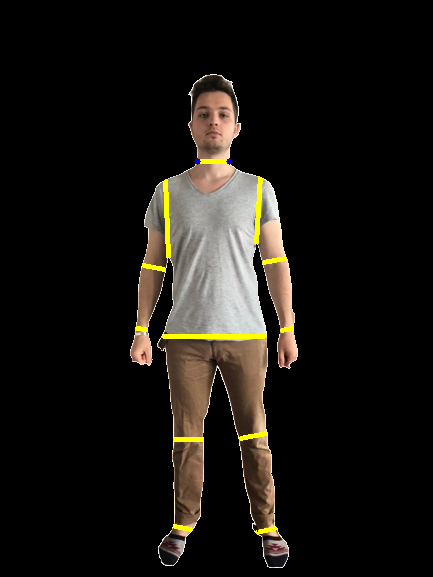

In [ ]:
npimg, key_points, cont = estimator.pose_estimate(no_bg_path)
new_img_path = './'+'estimated_'+ image_path[3:]
cv2.imwrite(new_img_path, npimg)
display(Image(new_img_path))


In [ ]:
key_points, cont

({'left_ankle': ((191, 529), (174, 526)),
  'left_arm': ((168, 257), (165, 178)),
  'left_elbow': ((164, 269), (143, 265)),
  'left_knee': ((202, 439), (174, 439)),
  'left_wrist': ((146, 329), (136, 328)),
  'legs': ((264, 336), (163, 336)),
  'neck': ((229, 161), (197, 161)),
  'right knee': ((266, 433), (240, 438)),
  'right_ankle': ((275, 528), (256, 532)),
  'right_arm': ((260, 175), (256, 243)),
  'right_elbow': ((285, 258), (263, 262)),
  'right_wrist': ((292, 328), (281, 330))},
 array([[209,  73],
        [210,  73],
        [211,  73],
        ...,
        [281, 568],
        [282, 568],
        [283, 568]]))

In [ ]:
def get_human_triangles(image_path, key_points):
    img_2 = cv2.imread(image_path)
    cont = get_contour_list(img_2)

    l_sh = tuple(get_shoulder(cont, key_points, side='left'))
    r_sh = tuple(get_shoulder(cont, key_points, side='right'))

    n1, n2 = key_points['neck']
    neck = sorted([list(n1), list(n2)], key=lambda x: x[0])
    l_arm = key_points['left_arm']
    l_arm = sorted([list(l_arm[0]), list(l_arm[1])], key=lambda x: x[1])
    r_arm = key_points['right_arm']
    r_arm = sorted([list(r_arm[0]), list(r_arm[1])], key=lambda x: x[1])

    legs = key_points['legs']
    legs = sorted([list(legs[0]), list(legs[1])], key=lambda x: x[0])

#     l_knee = key_points['left_knee']
#     l_knee = sorted([list(l_knee[0]), list(l_knee[1])], key=lambda x: x[0])
    
    l_elbow = key_points['left_elbow']
    l_elbow = sorted([list(l_elbow[0]), list(l_elbow[1])], key=lambda x: x[0])
    
    l_wrist = key_points['left_wrist']
    l_wrist = sorted([list(l_wrist[0]), list(l_wrist[1])], key=lambda x: x[0])
    
    r_elbow = key_points['right_elbow']
    r_elbow = sorted([list(r_elbow[0]), list(r_elbow[1])], key=lambda x: x[0], reverse=True)
    
    r_wrist = key_points['right_wrist']
    r_wrist = sorted([list(r_wrist[0]), list(r_wrist[1])], key=lambda x: x[0], reverse=True)
    # neck coords
    kp_left_neck = neck[0]
    kp_right_neck = neck[1]

    # armpits coords
    kp_left_armpit = l_arm[1]
    kp_right_armpit = r_arm[1]

    # belts coords
    kp_left_belt = legs[0]
    kp_right_belt = legs[1]

    # shoulders coords
    kp_left_shoulder = l_sh
    kp_right_shoulder = r_sh
    kp_left_bottom = kp_left_belt
    
    
    print(l_elbow)
    # coords for left arm
    kp_23, kp_24 = l_arm
    kp_26, kp_27 = l_elbow
    kp_28, kp_29 = l_wrist
    kp_25 = l_sh
    
    # coords for right arm
    kp_31 = r_sh
    kp_30, kp_32 = r_arm
    kp_33, kp_34 = r_elbow
    kp_35, kp_36 = r_wrist
    print(kp_23, kp_24, kp_26, kp_27, kp_28, kp_29)
#     kp_left_shoulder = l_arm[0]
#     kp_right_shoulder = r_arm[0]
    
    
#     triangles_human = [[kp_left_neck, kp_left_shoulder, kp_left_armpit],
#                        [kp_left_neck, kp_right_neck, kp_left_armpit],
#                        [kp_right_armpit, kp_right_neck, kp_left_armpit],
#                        [kp_right_armpit, kp_right_neck, kp_right_shoulder],
#                        [kp_right_armpit, kp_left_belt, kp_left_armpit],
#                        [kp_left_bottom, kp_right_belt, kp_right_armpit]]
    triangles = [[25, 24, 26],
                 [24, 26, 27],
                 [26, 27, 28],
                 [27, 28, 29]]
  
    triangles = [[31, 32, 33],
                 [32, 33, 34],
                 [33, 34, 35],
                 [34, 35, 36]]
    triangles_human = [[kp_left_neck, kp_left_shoulder, kp_left_armpit],
                       [kp_left_neck, kp_right_neck, kp_left_armpit],
                       [kp_right_armpit, kp_right_neck, kp_left_armpit],
                       [kp_right_armpit, kp_right_neck, kp_right_shoulder],
                       [kp_right_armpit, kp_left_belt, kp_left_armpit],
                       [kp_left_bottom, kp_right_belt, kp_right_armpit],
                       [kp_25, kp_24, kp_26],
                       [kp_24, kp_26, kp_27],
                       [kp_26, kp_27, kp_28],
                       [kp_27, kp_28, kp_29],
                       [kp_31, kp_32, kp_33],
                       [kp_32, kp_33, kp_34],
                       [kp_33, kp_34, kp_35],
                       [kp_34, kp_35, kp_36]
                      ]
    return triangles_human

def affine_transform(img, bg, p1, p2):
    """
        Make affine transform and overlay transformed image on background image
        :input
        -img  - path to transformed image (str)
        -bg   - path to background image  (str)
        -p1   - list of 3 points on transformed image
        -p2   - list of 3 points on background image
        :return
        -final image  - image with overlayed transformed image (numpy array)
    """
    im = img
    cols, rows, _ = bg.shape
    p1 = np.float32(p1)
    p2 = np.float32(p2)
    M = cv2.getAffineTransform(p1, p2)

    # Make affine transformation and resize im in bg.shape
    im = cv2.warpAffine(im, M, (rows, cols))

    # Get channels of transformed image
    alpha_channel = im[:, :, 3]
    rgb_channels = im[:, :, :3]
    # Alpha factor
    alpha_factor = alpha_channel[:, :, np.newaxis].astype(np.float32) / 255.0
    alpha_factor = np.concatenate((alpha_factor, alpha_factor, alpha_factor), axis=2)

    # Transparent Image Rendered on White Background
    base = rgb_channels.astype(np.float32) * alpha_factor
    white = bg.astype(np.float32) * (1 - alpha_factor)
    final_image = base + white
    return final_image, M

def cut_suit(suit_path):
    """
    Cut suit on 6 triangles
    :input
    suit_path - str
    :return
    suit_triangles - np.array
    """
    im = cv2.imread(suit_path, cv2.IMREAD_UNCHANGED)

    left_neck = [100, 5]
    right_neck = [165, 5]

    left_shoulder = [0, 47]
    right_shoulder = [265, 50]

    left_armpit = [39, 205]
    right_armpit = [226, 205]

    left_belt = [40, 400]
    right_belt = [220, 400]

    left_bottom = [20, 453]
    right_bottom = [245, 453]

    triangles = np.array([[left_neck, left_shoulder, left_armpit],
                          [left_neck, right_neck, left_armpit],
                          [right_armpit, right_neck, left_armpit],
                          [right_armpit, right_neck, right_shoulder],
                          [right_armpit, left_bottom, left_armpit],
                          [left_bottom, right_bottom, right_armpit]])
    n = 0
    images = []
    for t in triangles:
        copy_img = im.copy()
        triangle = cv2.drawContours(copy_img, [t], -1, [255, 0, 0, 255], -1)
        t1 = np.zeros(im.shape)
        t1[(triangle == [255, 0, 0, 255]).all(axis=-1)] = im[(triangle == [255, 0, 0, 255]).all(axis=-1)]
        s = 't' + str(n) + '.png'
        cv2.imwrite(s, t1)
        images.append(s)
        n += 1
#     left_shoulder = [39, 37]
#     right_shoulder = [226, 37]
    triangles_suit = np.array([[left_neck, left_shoulder, left_armpit],
                               [left_neck, right_neck, left_armpit],
                               [right_armpit, right_neck, left_armpit],
                               [right_armpit, right_neck, right_shoulder],
                               [right_armpit, left_belt, left_armpit],
                               [left_bottom, right_belt, right_armpit]])
    return triangles_suit, images
  
def cut_by_contour(img, zones):
    """
    input:
    img - path of suit for cut
    zones - list of list of coords that determine zones
    
    return:
    parts - img parts (zones) as np.array
    """
    
    
    im = cv2.imread(img, cv2.IMREAD_UNCHANGED)
    parts = []
    for t in zones:  
      copy_img = im.copy()
      t = np.array(t)
      triangle = cv2.drawContours(copy_img, [t], -1, [255,0,0,255], -1)
      t1 = np.zeros(im.shape)
      t1[(triangle==[255,0,0,255]).all(axis=-1)] = im[(triangle==[255,0,0,255]).all(axis=-1)]
      parts.append(t1)
    return np.array(parts)      

def fit_suit(bg_img, human_triangles, suit_triangles, suit_images):
    bg_img = cv2.imread(bg_img)
    left_bottom = suit_triangles[5][0]
    for i in range(len(suit_images)):
        coords_0 = suit_triangles[i]
        coords_1 = human_triangles[i]
        im = suit_images[i]
        bg_img, M = affine_transform(img=im, bg=bg_img, p1=coords_0, p2=coords_1)
        if i == 4:
            kp_left_bottom = (np.dot(M, [left_bottom[0], left_bottom[1], 1])).astype(int)
            human_triangles[5][0] = kp_left_bottom
    return bg_img
  
# Координаты для разделения на зоны
p1_1 = [0, 200]
p1_2 = [20, 0]
p1_3 = [70, 0]
p1_4 = [75, 165]

p2_1 = p1_1
p2_2 = p1_4
p2_3 = [75, 200]
p2_4 = [65, 220]

p3_1 = p1_1
p3_2 = p2_4
p3_3 = [2, 360]

p4_1 = p2_4
p4_2 = [75, 362]
p4_3 = p3_3

left_neck = [100, 5]
right_neck = [165, 5]
left_shoulder = [0, 47]
right_shoulder = [265, 50]
left_armpit = [39, 205]
right_armpit = [226, 205]
left_belt = [40, 400]
right_belt = [220, 400]
left_bottom = [20, 453]
right_bottom = [245, 453]

zones_larm = [[p1_1, p1_2, p1_3, p1_4],
               [p2_1, p2_2, p2_3, p2_4],
               [p3_1, p3_2, p3_3],
               [p4_1, p4_2, p4_3]]

zones_suit = np.array([[left_neck, left_shoulder, left_armpit],
                          [left_neck, right_neck, left_armpit],
                          [right_armpit, right_neck, left_armpit],
                          [right_armpit, right_neck, right_shoulder],
                          [right_armpit, left_bottom, left_armpit],
                          [left_bottom, right_bottom, right_armpit]])

triangles_suit = np.array([[left_neck, left_shoulder, left_armpit],
                               [left_neck, right_neck, left_armpit],
                               [right_armpit, right_neck, left_armpit],
                               [right_armpit, right_neck, right_shoulder],
                               [right_armpit, left_belt, left_armpit],
                               [left_bottom, right_belt, right_armpit]])
dict_l_arm = {25: [35, 0],
              24: [76, 170],
              26: [7, 200],
              27: [65, 220],
              28: [2, 360],
              29: [45, 357]}
triangles = [[25, 24, 26],
             [24, 26, 27],
             [26, 27, 28],
             [27, 28, 29]]
larm_triangles = []
for t in triangles:
  z = []
  for j in t:
    z.append(dict_l_arm[j])
  larm_triangles.append(z) 


[[143, 265], [164, 269]]
[165, 178] [168, 257] [143, 265] [164, 269] [136, 328] [146, 329]
(6, 465, 265, 4) (4, 362, 76, 4)
(14,)


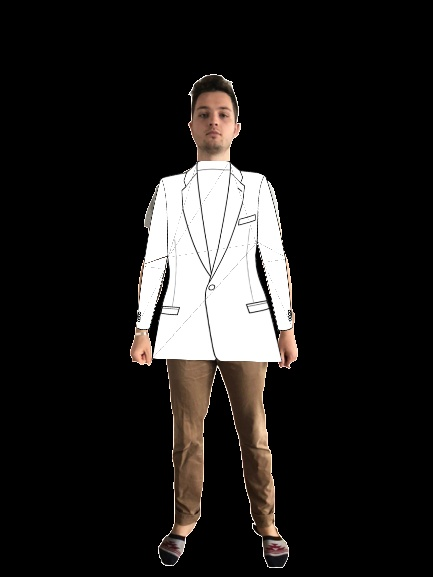

In [ ]:
human_triangles = get_human_triangles(no_bg_path, key_points)
# suit_triangles, suit_imgs = cut_suit('suit.png')
suit_parts = cut_by_contour('suit.png', zones_suit)

left_arm_parts = cut_by_contour('left_arm.png', zones_larm)
suit_triangles = np.concatenate((triangles_suit, larm_triangles, larm_triangles),axis=0)
print(suit_parts.shape, left_arm_parts.shape)

parts = np.array((*suit_parts, *left_arm_parts, *left_arm_parts))
print(parts.shape)
npimg = fit_suit(no_bg_path, human_triangles, suit_triangles, suit_images=parts)
l_sh = human_triangles[0][1]
l_arm = key_points['left_arm'][1]
# cv2.circle(npimg, l_sh, 3, (255, 0, 255), -1)
# cv2.circle(npimg, l_arm, 3, (255, 0, 255), -1)
cv2.imwrite('new_img.jpg', npimg)
display(Image('new_img.jpg'))

[2019-05-21 20:39:00,089] [TfPoseEstimator] [DEBUG] inference+ original shape=433x577
[2019-05-21 20:39:00,089] [TfPoseEstimator] [DEBUG] inference+ original shape=433x577
2019-05-21 20:39:00,089 DEBUG inference+ original shape=433x577
[2019-05-21 20:39:00,125] [TfPoseEstimator] [DEBUG] inference- heatMat=216x184 pafMat=216x184
[2019-05-21 20:39:00,125] [TfPoseEstimator] [DEBUG] inference- heatMat=216x184 pafMat=216x184
2019-05-21 20:39:00,125 DEBUG inference- heatMat=216x184 pafMat=216x184
[2019-05-21 20:39:00,134] [TfPoseEstimator] [DEBUG] estimate time=0.00588
[2019-05-21 20:39:00,134] [TfPoseEstimator] [DEBUG] estimate time=0.00588
2019-05-21 20:39:00,134 DEBUG estimate time=0.00588
[2019-05-21 20:39:00,139] [TfPoseEstimator] [INFO] inference image: new_no_bg.png in 0.0496 seconds.
[2019-05-21 20:39:00,139] [TfPoseEstimator] [INFO] inference image: new_no_bg.png in 0.0496 seconds.
2019-05-21 20:39:00,139 INFO inference image: new_no_bg.png in 0.0496 seconds.
/usr/local/lib/python3.

[[143, 265], [164, 269]]
[165, 178] [168, 257] [143, 265] [164, 269] [136, 328] [146, 329]
(6, 465, 265, 4) (4, 362, 76, 4)
(14,)


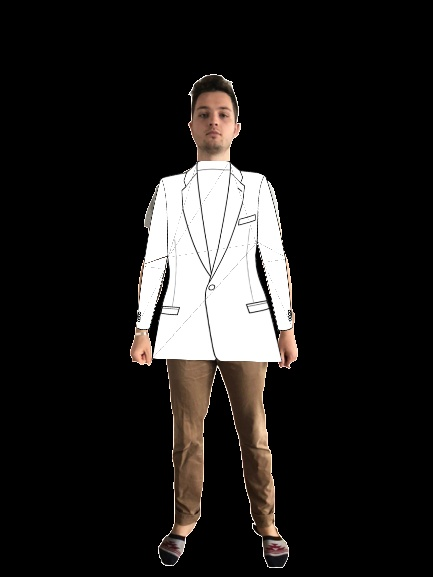

In [ ]:
image_path = 'file21.png'

no_bg_path = 'new_no_bg.png'
response = get_no_bg_img(image_path, api_key)
with open(no_bg_path,'wb') as f:
    f.write(response.content)
    

npimg, key_points, cont = estimator.pose_estimate(no_bg_path)
new_img_path = './'+'estimated_'+ image_path[3:]
cv2.imwrite(new_img_path, npimg)

human_triangles = get_human_triangles(no_bg_path, key_points)
suit_parts = cut_by_contour('suit.png', zones_suit)

left_arm_parts = cut_by_contour('left_arm.png', zones_larm)
suit_triangles = np.concatenate((triangles_suit, larm_triangles, larm_triangles),axis=0)
print(suit_parts.shape, left_arm_parts.shape)

parts = np.array((*suit_parts, *left_arm_parts, *left_arm_parts))
print(parts.shape)
npimg = fit_suit(no_bg_path, human_triangles, suit_triangles, suit_images=parts)
l_sh = human_triangles[0][1]
l_arm = key_points['left_arm'][1]
cv2.imwrite('new_img.jpg', npimg)
display(Image('new_img.jpg'))

# display(Image(new_img_path))